# T-Tests in Python and R

This notebook has examples of t-tests in both python and R.

To run both Python and R in a single file, rpy2 must be installed:
    `pip install rpy2`

In [2]:
from IPython.display import VimeoVideo
# Tutorial Video Name: t-tests in both python and R
VimeoVideo('633115787', width=720, height=480)

https://vimeo.com/633115787

## Check versions ##

In [8]:
import sys
sys.version

'3.9.7 (default, Sep  3 2021, 12:37:55) \n[Clang 12.0.5 (clang-1205.0.22.9)]'

In [10]:
# This must be run once in the notebook to activate rpy functionality
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%R version

<rpy2.robjects.vectors.ListVector object at 0x10302f100> [RTYPES.VECSXP]
R classes: ('simple.list',)
[StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe..., ..., StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  platform: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d20380> [RTYPES.STRSXP]
R classes: ('character',)
['x86_64-apple-darwin17.0']
  arch: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d20400> [RTYPES.STRSXP]
R classes: ('character',)
['x86_64']
  os: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d1db40> [RTYPES.STRSXP]
R classes: ('character',)
['darwin17.0']
  system: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d1dac0> [RTYPES.STRSXP]
R classes: ('character',)
['x86_64, darwin17.0']
...
  major: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d1d480> [RTYPES.STRSXP]
R classes: ('character',)
['80725']
  minor: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d1d500> [RTYPES.STRSXP]
R classes: ('character',)
['R']
  year: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1030691c0> [RTYPES.STRSXP]
R classes: ('character',)
['R version 4.1.1 (2021-08-10)']
  month: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x124d16ec0> [RTYPES.STRSXP]
R classes: ('character',)
['Kick Things']

## Python Data Generation

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
def generate_normal_data(mu=0, sigma=1, n=1000):
    samples = np.random.normal(mu, sigma, n)
    return samples

In [15]:
a = generate_normal_data(mu=22, sigma=3)
b = generate_normal_data(mu=25, sigma=5)

In [16]:
df = pd.DataFrame()
df['a'] = a
df['b'] = b

In [17]:
df

,a,b
0,26.442794,23.169722
1,21.961954,29.632793
2,22.301710,22.888729
3,23.171611,22.438409
4,18.626995,21.933036
...,...,...
995,25.545341,23.012560
996,27.441125,25.033920
997,25.352377,27.802236
998,19.575227,31.889990


## Plot data in Python

<AxesSubplot:>

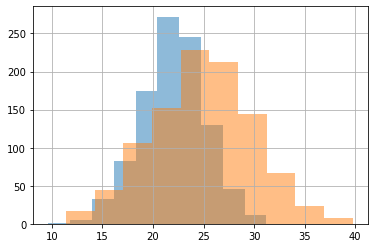

In [26]:
df['a'].hist(alpha=.5)
df['b'].hist(alpha=.5)

## 1 and 2 sample TTests in Python

* Single sample ttest-will evaluate whether a sample distribution differs significantly from a value
    - In the below example, we will compare whether sample a differ from the value of 22
    - A does NOT significantly differ, but b does
* Two Sample independent ttest
    - Will compare if the two samples differ from each other

In [18]:
from scipy import stats

In [19]:
stats.ttest_1samp(df['a'], 22)

Ttest_1sampResult(statistic=-0.02820876669881933, pvalue=0.9775012791939481)

In [27]:
stats.ttest_1samp(df['b'], 22)

Ttest_1sampResult(statistic=18.612696529086957, pvalue=1.2938018432493793e-66)

In [28]:
stats.ttest_ind(df['a'], df['b'])

Ttest_indResult(statistic=-15.686367371960479, pvalue=2.1922269186193922e-52)

## Generate Data in R

In [46]:
%R a <- rnorm(n=1000, mean=22, sd=3)
%R b <- rnorm(n=1000, mean=25, sd=5)

array([29.45902634, 35.05291857, 36.48990717, 22.22826087, 23.10626081,
       28.46990683, 27.97828038, 12.18817639, 23.26971426, 20.12949268,
       22.44521357, 28.50569081, 23.92970691, 30.38631856, 37.05097125,
       25.65673192, 19.29407701, 32.63281725, 22.93241285, 22.1235298 ,
       25.02381957, 21.14508511, 26.3384406 , 24.36356701, 33.95153087,
       23.19869238, 28.5781145 , 21.4959758 , 26.43169569, 21.18538551,
       26.73152348, 23.60851704, 21.22065803, 27.21194662, 27.92642452,
       26.13262607, 20.2353388 , 18.68827975, 20.57241015, 22.41756212,
       15.51609843, 25.54666487, 24.02186063, 21.21577129, 29.6299375 ,
       24.21771254, 25.31977664, 22.61638161, 22.08746549, 24.02916308,
       25.86216128, 18.29396921, 26.40084172, 24.4639481 , 19.22455478,
       36.7722287 , 27.43149048, 22.21775626, 24.70053551, 27.77991005,
       26.03765987, 28.33357197, 21.56492338, 22.05551587, 21.14812719,
       19.77759147, 21.72771707, 25.62266138, 33.75671656, 30.61

In [44]:
%R df <- data.frame(a, b)

,a,b
1,22.777075,27.708214
2,20.762456,25.601664
3,20.275274,30.783843
4,17.716534,29.695230
5,21.849138,25.485321
...,...,...
996,18.545248,28.289917
997,18.827209,28.119102
998,21.701071,28.270438
999,19.175253,24.944993


## Plot data in R

In [63]:
%R require(ggplot2)

1


In [65]:
%R sapply(df, class)

'numeric','numeric'


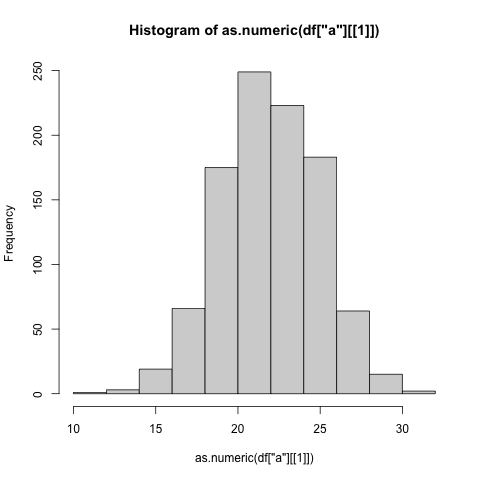

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [76]:
%R hist(as.numeric(df['a'][[1]]))

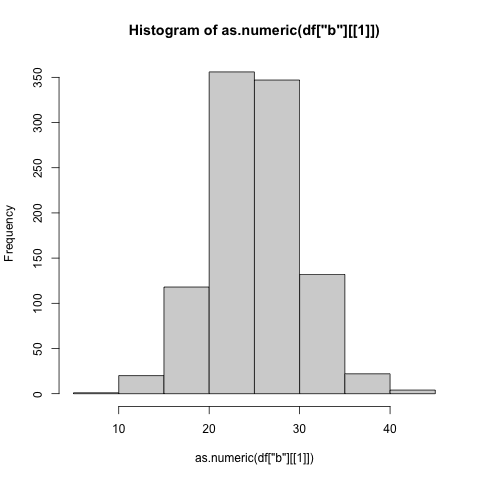

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [77]:
%R hist(as.numeric(df['b'][[1]]))

## 1 and 2 Sample ttests in R

In [78]:
%R t.test(a, mu=22)

<rpy2.robjects.vectors.ListVector object at 0x13e34af80> [RTYPES.VECSXP]
R classes: ('htest',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  statistic: <class 'numpy.ndarray'>
  array([0.00982863])
  parameter: <class 'numpy.ndarray'>
  array([999.])
  p.value: <class 'numpy.ndarray'>
  array([0.99215998])
  conf.int: <class 'numpy.ndarray'>
  array([21.81283561, 22.1890487 ])
...
  null.value: <class 'numpy.ndarray'>
  array([0.09585821])
  stderr: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e21bdc0> [RTYPES.STRSXP]
R classes: ('character',)
['two.sided']
  alternative: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e21b300> [RTYPES.STRSXP]
R classes: ('character',)
['One Sample t-test']
  method: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e21bf80> [RTYPES.STRSXP]
R classes: ('character',)
['a']

In [79]:
%R t.test(b, mu=22)

<rpy2.robjects.vectors.ListVector object at 0x13e34a0c0> [RTYPES.VECSXP]
R classes: ('htest',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  statistic: <class 'numpy.ndarray'>
  array([20.5171104])
  parameter: <class 'numpy.ndarray'>
  array([999.])
  p.value: <class 'numpy.ndarray'>
  array([2.43971775e-78])
  conf.int: <class 'numpy.ndarray'>
  array([24.89324596, 25.50522195])
...
  null.value: <class 'numpy.ndarray'>
  array([0.15593005])
  stderr: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e35d800> [RTYPES.STRSXP]
R classes: ('character',)
['two.sided']
  alternative: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e347400> [RTYPES.STRSXP]
R classes: ('character',)
['One Sample t-test']
  method: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e347600> [RTYPES.STRSXP]
R classes: ('character',)
['b']

In [80]:
%R t.test(a, b)

<rpy2.robjects.vectors.ListVector object at 0x13e19a3c0> [RTYPES.VECSXP]
R classes: ('htest',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  statistic: <class 'numpy.ndarray'>
  array([-17.47335858])
  parameter: <class 'numpy.ndarray'>
  array([1659.7171431])
  p.value: <class 'numpy.ndarray'>
  array([6.85488807e-63])
  conf.int: <class 'numpy.ndarray'>
  array([-3.55730186, -2.83928175])
...
  null.value: <class 'numpy.ndarray'>
  array([0.18303818])
  stderr: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e329840> [RTYPES.STRSXP]
R classes: ('character',)
['two.sided']
  alternative: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e21e640> [RTYPES.STRSXP]
R classes: ('character',)
['Welch Two Sample t-test']
  method: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x13e21e9c0> [RTYPES.STRSXP]
R classes: ('character',)
['a and b']